<a href="https://colab.research.google.com/github/lalitha12-web/Melanoma-Detection-Assignment/blob/main/Lalitha_nn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Problem statement:** To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

### Importing Skin Cancer Data
### **Take necessary actions to read the data**

### Importing all the important libraries

In [ ]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
import glob
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.models import Sequential
from skimage import io
import imageio

In [ ]:
## If you are using the data by mounting the google drive, use the following :
from google.colab import drive
drive.mount('/content/gdrive')



Mounted at /content/gdrive


This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [ ]:
# Defining the path for train and test images
## Todo: Update the paths of the train and test dataset
data_dir_train = pathlib.Path("/content/drive/MyDrive/IIITB-AIML/Skin cancer ISIC The International Skin Imaging Collaboration/Train")
data_dir_test = pathlib.Path("/content/drive/MyDrive/IIITB-AIML/Skin cancer ISIC The International Skin Imaging Collaboration/Test")

In [ ]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


### **Load using keras.preprocessing**

Let's load these images off disk using the helpful image_dataset_from_directory utility.

## **Create a dataset**

Define some parameters for the loader:

In [ ]:
batch_size = 32
img_height = 180
img_width = 180

Use 80% of the images for training, and 20% for validation.

In [ ]:
## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  label_mode='categorical',
  labels = "inferred",
  validation_split=0.2,
  subset="training",
  shuffle=True,
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size
)

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [ ]:
## Write your validation dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
val_ds = train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  label_mode='categorical',
  labels = "inferred",
  validation_split=0.2,
  subset="validation",
  shuffle=True,
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size
)

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [ ]:
# List out all the classes of skin cancer and store them in a list.
# You can find the class names in the class_names attribute on these datasets.
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
print(class_names)
num_classes = len(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


### **Visualize the data**
####  create a code to visualize one instance of all the nine classes present in the dataset

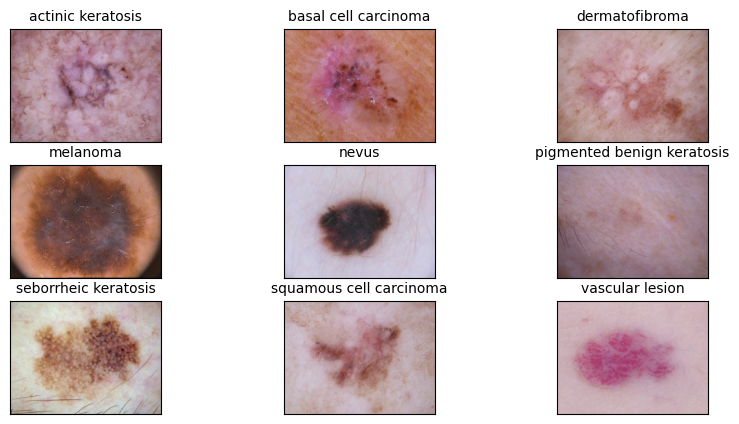

In [ ]:
fig = plt.figure(figsize=(10,5))
for i in range(len(class_names)):
    plot = fig.add_subplot(3, 3, 1 + i, xticks=[], yticks=[])
    cancer_class_path = os.path.join(data_dir_train, class_names[i],'*')
    cancer_class_path = glob.glob(cancer_class_path)
    rand_index = np.random.randint(0, len(cancer_class_path))
    im = io.imread(cancer_class_path[rand_index])
    plot.set_title(class_names[i],fontsize = 10)
    plt.imshow(im)
plt.show()

The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [ ]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### **Create the model on Raw data**
####  Create a CNN model, which can accurately detect 9 classes present in the dataset. Use ```layers.experimental.preprocessing.Rescaling``` to normalize pixel values between (0,1). The RGB channel values are in the `[0, 255]` range.

In [ ]:
# Building model
model = tf.keras.Sequential()

#Rescaling
model.add(layers.Rescaling(1./255, input_shape=(img_height, img_width,3)))

# 1st Convolutional Layer with Max Pooling
model.add(Conv2D(32, (3, 3), padding='same' ))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# 2nd Convolutional Layer with Max Pooling
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Fully Connected Layer
model.add(Flatten())
model.add(Dense(num_classes))
model.add(Activation('softmax'))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


### **Compile the model**
Choose an appropirate optimiser and loss function for model training

In [ ]:
### Todo, choose an appropirate optimiser and loss function
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# View the summary of all layers
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)                │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 180, 180, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 180, 180, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 178, 178, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 178, 178, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 89, 89, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 89, 89, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 89, 89, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 87, 87, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_3 (Activation)            │ (None, 87, 87, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 43, 43, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 118336)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 9)                   │       1,065,033 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_4 (Activation)            │ (None, 9)                   │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,130,601 (4.31 MB)

 Trainable params: 1,130,601 (4.31 MB)

 Non-trainable params: 0 (0.00 B)

### **Train the model**

In [ ]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 91s 1s/step - accuracy: 0.1812 - loss: 2.4218 - val_accuracy: 0.2416 - val_loss: 2.0259
Epoch 2/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 53s 86ms/step - accuracy: 0.2677 - loss: 1.9801 - val_accuracy: 0.3512 - val_loss: 1.9367
Epoch 3/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 81ms/step - accuracy: 0.2999 - loss: 1.8970 - val_accuracy: 0.3669 - val_loss: 1.6580
Epoch 4/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 73ms/step - accuracy: 0.4174 - loss: 1.6785 - val_accuracy: 0.4004 - val_loss: 1.5731
Epoch 5/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 74ms/step - accuracy: 0.3853 - loss: 1.6184 - val_accuracy: 0.4720 - val_loss: 1.3780
Epoch 6/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 73ms/step - accuracy: 0.5005 - loss: 1.4090 - val_accuracy: 0.5168 - val_loss: 1.3192
Epoch 7/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 81ms/step - accuracy: 0.5324 - loss: 1.3576 - val_accuracy: 0.5593 - val_loss: 1.2821
Epoch 8/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 74ms/step - accuracy: 0.5699 - loss: 1.2495 - val_accuracy: 0.6264 - v

## **Visualizing training results**

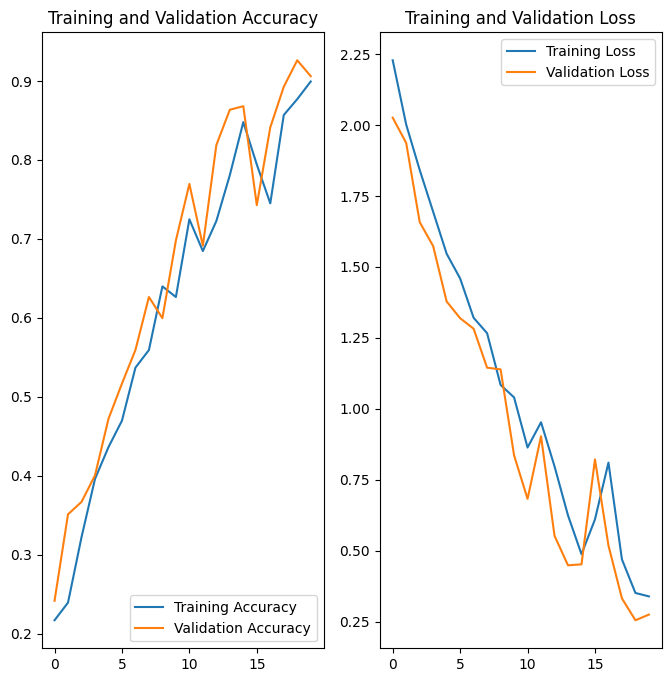

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

####** Findings**: Both the train accuracy and validation accuracy have reached 90% but the loss is NOT constantly decreasing. Loss is varying too much and thus the model is not the right fit.

In [ ]:
# Data augumentation strategy
data_augmentation = tf.keras.Sequential(
  [
    layers.RandomFlip("horizontal_and_vertical",input_shape=(img_height,img_width,3)),
    layers.RandomRotation(0.2),
    layers.RandomZoom(0.2),
    layers.RandomContrast(0.1)
  ]
)

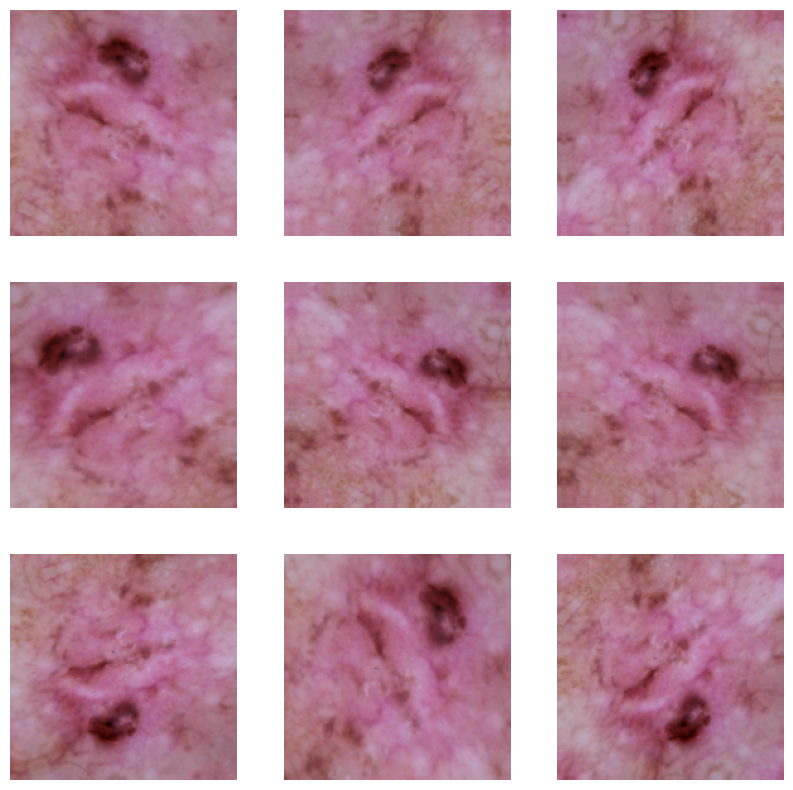

In [ ]:
# Visualizing how the augmentation strategy works for one instance of training image
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")


## **Create the model, compile and train the model after apply the Data augumentation**


In [ ]:
## You can use Dropout layer if there is an evidence of overfitting in your findings
# Building model with dropout layers
model = tf.keras.Sequential()

#Rescaling
model.add(layers.Rescaling(1./255, input_shape=(img_height, img_width,3)))

# Adding data augmention to the model
model.add(data_augmentation)

# 1st Convolutiontional layer with MaxPooling Layer
model.add(Conv2D(32, (3, 3), padding='same' ))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

#Adding dropout layer
model.add(Dropout(0.25))

# 2nd Convolutiontional layer with MaxPooling Layer
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

#Adding dropout layer
model.add(Dropout(0.25))

# Fully Connected Layer
model.add(Flatten())
model.add(Dense(num_classes))
model.add(Activation('softmax'))



### **Compiling the model**

In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

### **Training the model**

In [ ]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 9s 262ms/step - accuracy: 0.1813 - loss: 3.4541 - val_accuracy: 0.1812 - val_loss: 2.0254
Epoch 2/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 5s 118ms/step - accuracy: 0.2170 - loss: 2.1205 - val_accuracy: 0.2371 - val_loss: 2.0406
Epoch 3/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 142ms/step - accuracy: 0.2335 - loss: 2.0991 - val_accuracy: 0.1946 - val_loss: 2.0687
Epoch 4/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 119ms/step - accuracy: 0.1849 - loss: 2.0635 - val_accuracy: 0.2170 - val_loss: 2.0007
Epoch 5/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 3s 118ms/step - accuracy: 0.2139 - loss: 2.0365 - val_accuracy: 0.3020 - val_loss: 1.9436
Epoch 6/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 117ms/step - accuracy: 0.2717 - loss: 1.9547 - val_accuracy: 0.3311 - val_loss: 1.8279
Epoch 7/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 141ms/step - accuracy: 0.2945 - loss: 1.8310 - val_accuracy: 0.2886 - val_loss: 1.8663
Epoch 8/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 3s 142ms/step - accuracy: 0.3515 - loss: 1.7563 - val_accuracy: 0.

### **Visualizing the results**

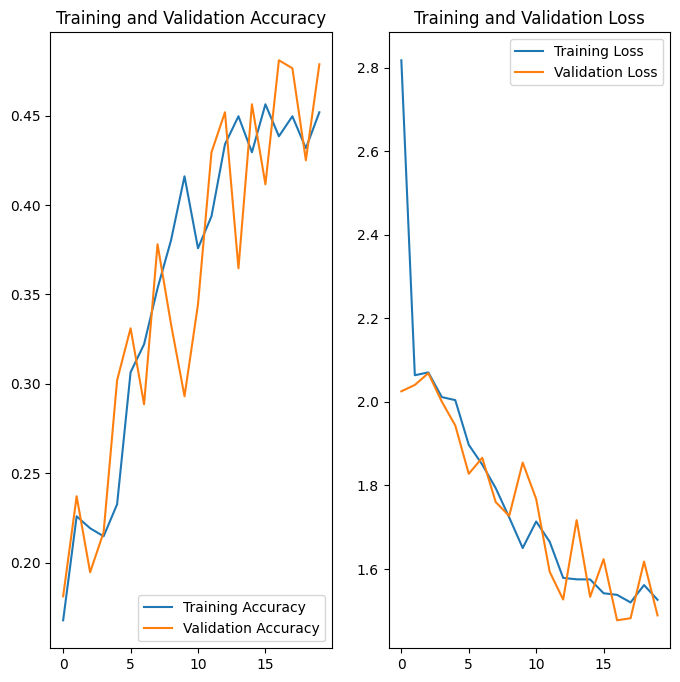

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Findings: The model is not performing well for both the training and validation dataset thus, the model is underfit

##  **Find the distribution of classes in the training dataset.**
#### **Context:** Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

In [ ]:
def class_distribution_count(directory):

    #count number of image in each classes
    count= []
    for path in pathlib.Path(directory).iterdir():
        if path.is_dir():
            count.append(len([name for name in os.listdir(path)
                               if os.path.isfile(os.path.join(path, name))]))

    #name of the classes
    sub_directory = [name for name in os.listdir(directory)
                    if os.path.isdir(os.path.join(directory, name))]

    #return dataframe with image count and class.
    return pd.DataFrame(list(zip(sub_directory,count)),columns =['Class', 'No. of Image'])

df = class_distribution_count(data_dir_train)
df

,Class,No. of Image
0,actinic keratosis,114
1,vascular lesion,139
2,nevus,357
3,basal cell carcinoma,376
4,pigmented benign keratosis,462
5,seborrheic keratosis,77
6,melanoma,438
7,squamous cell carcinoma,181
8,dermatofibroma,95
9,.ipynb_checkpoints,0


### **Findings:**
#### - seborrheic keratosis has the least number of images - 77
#### - pigmented benign keratosis has the maximum number of images - 462


## **Rectify the class imbalance**
#### **Context:** You can use a python package known as `Augmentor` (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

In [ ]:
!pip install Augmentor

To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


In [ ]:
path_to_training_dataset="/content/drive/MyDrive/IIITB-AIML/Skin cancer ISIC The International Skin Imaging Collaboration/Train/"
import Augmentor
for name in class_names:
    aug = Augmentor.Pipeline(path_to_training_dataset + name)
    aug.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    aug.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Initialised with 114 image(s) found.
Output directory set to /content/gdrive/MyDrive/Skin_Cancer_Dataset/Train/actinic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7CE68A75B700>: 100%|██████████| 500/500 [00:25<00:00, 19.63 Samples/s]


Initialised with 376 image(s) found.
Output directory set to /content/gdrive/MyDrive/Skin_Cancer_Dataset/Train/basal cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7CE6807F2CE0>: 100%|██████████| 500/500 [00:19<00:00, 25.52 Samples/s]


Initialised with 95 image(s) found.
Output directory set to /content/gdrive/MyDrive/Skin_Cancer_Dataset/Train/dermatofibroma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7CE68A937610>: 100%|██████████| 500/500 [00:19<00:00, 25.85 Samples/s]


Initialised with 438 image(s) found.
Output directory set to /content/gdrive/MyDrive/Skin_Cancer_Dataset/Train/melanoma/output.

Processing <PIL.Image.Image image mode=RGB size=3072x2304 at 0x7CE6807D5E10>: 100%|██████████| 500/500 [01:24<00:00,  5.90 Samples/s]


Initialised with 357 image(s) found.
Output directory set to /content/gdrive/MyDrive/Skin_Cancer_Dataset/Train/nevus/output.

Processing <PIL.Image.Image image mode=RGB size=1504x1129 at 0x7CE68A7E9000>: 100%|██████████| 500/500 [01:20<00:00,  6.18 Samples/s]


Initialised with 462 image(s) found.
Output directory set to /content/gdrive/MyDrive/Skin_Cancer_Dataset/Train/pigmented benign keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7CE6807AED10>: 100%|██████████| 500/500 [00:18<00:00, 26.60 Samples/s]


Initialised with 77 image(s) found.
Output directory set to /content/gdrive/MyDrive/Skin_Cancer_Dataset/Train/seborrheic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7CE6E05431F0>: 100%|██████████| 500/500 [00:43<00:00, 11.57 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/gdrive/MyDrive/Skin_Cancer_Dataset/Train/squamous cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7CE6807AD450>: 100%|██████████| 500/500 [00:19<00:00, 26.21 Samples/s]


Initialised with 139 image(s) found.
Output directory set to /content/gdrive/MyDrive/Skin_Cancer_Dataset/Train/vascular lesion/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7CE700158820>: 100%|██████████| 500/500 [00:18<00:00, 27.00 Samples/s]


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [ ]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

4500


### Lets see the distribution of augmented data after adding new images to the original training data.

In [ ]:
path_list_new = [x for x in glob.glob(os.path.join(data_dir_train, '*','output','*.jpg'))]
path_list_new

['/content/gdrive/MyDrive/Skin_Cancer_Dataset/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0032422.jpg_f5e984e7-44b8-4522-8e14-74391ca6e47d.jpg',
 '/content/gdrive/MyDrive/Skin_Cancer_Dataset/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0028076.jpg_65010f9b-bff3-4411-9b30-d0d787b5f1d6.jpg',
 '/content/gdrive/MyDrive/Skin_Cancer_Dataset/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0029460.jpg_622878e5-85dd-4b9b-9d70-e9af2d1f7c75.jpg',
 '/content/gdrive/MyDrive/Skin_Cancer_Dataset/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0028393.jpg_d6cf94f5-bcce-415e-a780-7e6e2a1b099f.jpg',
 '/content/gdrive/MyDrive/Skin_Cancer_Dataset/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0031922.jpg_3839407b-ff15-4c94-a113-e0711b76b400.jpg',
 '/content/gdrive/MyDrive/Skin_Cancer_Dataset/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0026650.jpg_ff4be965-6633-4cea-9e6d-bc38badcc257.jpg',
 '/content/gdriv

In [ ]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob.glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
lesion_list_new

['actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic 

In [ ]:
dataframe_dict_new = dict(zip(path_list_new, lesion_list_new))

In [ ]:
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])
#new_df = original_df.append(df2)
df2

,Path,Label
0,/content/gdrive/MyDrive/Skin_Cancer_Dataset/Tr...,actinic keratosis
1,/content/gdrive/MyDrive/Skin_Cancer_Dataset/Tr...,actinic keratosis
2,/content/gdrive/MyDrive/Skin_Cancer_Dataset/Tr...,actinic keratosis
3,/content/gdrive/MyDrive/Skin_Cancer_Dataset/Tr...,actinic keratosis
4,/content/gdrive/MyDrive/Skin_Cancer_Dataset/Tr...,actinic keratosis
...,...,...
4495,/content/gdrive/MyDrive/Skin_Cancer_Dataset/Tr...,dermatofibroma
4496,/content/gdrive/MyDrive/Skin_Cancer_Dataset/Tr...,dermatofibroma
4497,/content/gdrive/MyDrive/Skin_Cancer_Dataset/Tr...,dermatofibroma
4498,/content/gdrive/MyDrive/Skin_Cancer_Dataset/Tr...,dermatofibroma


In [ ]:
df2['Label'].value_counts()

,count
Label,
actinic keratosis,500
vascular lesion,500
nevus,500
basal cell carcinoma,500
pigmented benign keratosis,500
seborrheic keratosis,500
melanoma,500
squamous cell carcinoma,500
dermatofibroma,500


So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

## **Train the model on the data created using Augmentor**

In [ ]:
batch_size = 32
img_height = 180
img_width = 180

#### **Todo:** Create a training dataset

In [ ]:
data_dir_train="/content/drive/MyDrive/IIITB-AIML/Skin cancer ISIC The International Skin Imaging Collaboration/Train"
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = "training",
  image_size=(img_height, img_width),
  batch_size=batch_size
  )

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


####  **Create a validation dataset**

In [ ]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = "validation",
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


### **Create your model (make sure to include normalization)**

In [ ]:
model = tf.keras.Sequential()

# Rescaling the images
model.add(layers.Rescaling(1./255, input_shape=(img_height, img_width,3)))

# Data Augmentation
model.add(data_augmentation)

# 1st Convolutional Layer with Max Pooling, Batch Normalization and Dropout layers
model.add(Conv2D(32, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))


# 2nd Convolutional Layer with Max Pooling, Batch Normalization and Dropout layers
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Fully Connected Layer
model.add(Flatten())
model.add(Dense(num_classes))
model.add(Activation('softmax'))

### **Compile your model (Choose optimizer and loss function appropriately)**

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling_4 (Rescaling)              │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential_1 (Sequential)            │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_16 (Conv2D)                   │ (None, 180, 180, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_21 (Activation)           │ (None, 180, 180, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_8                │ (None, 180, 180, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_17 (Conv2D)                   │ (None, 178, 178, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_22 (Activation)           │ (None, 178, 178, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_9                │ (None, 178, 178, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 89, 89, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 89, 89, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_18 (Conv2D)                   │ (None, 89, 89, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_23 (Activation)           │ (None, 89, 89, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_10               │ (None, 89, 89, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_19 (Conv2D)                   │ (None, 87, 87, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_24 (Activation)           │ (None, 87, 87, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_11               │ (None, 87, 87, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 43, 43, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 43, 43, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 118336)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 1,131,369 (4.32 MB)

 Trainable params: 1,130,985 (4.31 MB)

 Non-trainable params: 384 (1.50 KB)

###  **Train your model**

In [ ]:
epochs = 50
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs
)

Epoch 1/50
169/169 ━━━━━━━━━━━━━━━━━━━━ 52s 274ms/step - accuracy: 0.2768 - loss: 13.5825 - val_accuracy: 0.1403 - val_loss: 3.1587
Epoch 2/50
169/169 ━━━━━━━━━━━━━━━━━━━━ 78s 261ms/step - accuracy: 0.4115 - loss: 1.8043 - val_accuracy: 0.1269 - val_loss: 2.7514
Epoch 3/50
169/169 ━━━━━━━━━━━━━━━━━━━━ 44s 261ms/step - accuracy: 0.4304 - loss: 1.6136 - val_accuracy: 0.3200 - val_loss: 2.1019
Epoch 4/50
169/169 ━━━━━━━━━━━━━━━━━━━━ 85s 280ms/step - accuracy: 0.4501 - loss: 1.5235 - val_accuracy: 0.3749 - val_loss: 2.0085
Epoch 5/50
169/169 ━━━━━━━━━━━━━━━━━━━━ 82s 282ms/step - accuracy: 0.4925 - loss: 1.3723 - val_accuracy: 0.4491 - val_loss: 1.4743
Epoch 6/50
169/169 ━━━━━━━━━━━━━━━━━━━━ 79s 265ms/step - accuracy: 0.5090 - loss: 1.3435 - val_accuracy: 0.4246 - val_loss: 1.5754
Epoch 7/50
169/169 ━━━━━━━━━━━━━━━━━━━━ 83s 275ms/step - accuracy: 0.5271 - loss: 1.2615 - val_accuracy: 0.5041 - val_loss: 1.3598
Epoch 8/50
169/169 ━━━━━━━━━━━━━━━━━━━━ 83s 280ms/step - accuracy: 0.5189 - loss: 

###  **Visualize the model results**

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### **Findings:** The model couldn't run for the 50 epochs, therefore I am arriving my findings considering epochs = 40 for the final model.

#### **Training accuracy has been around 66% whereas the accuracy for validation dataset seems to be around 57%. The loss is also varying and has not reduced a lot.**

